__Plotting script comparing the temporal development of temperature anomaly for SimMod and observations.__

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 15

In [2]:
dpi=100

In [3]:
obs_temp_path = "../data/preprocessed/Observations_TAnom.csv"
simmod_path = "../data/preprocessed/SimMod_timeseries.csv"

obs_temp = pd.read_csv(obs_temp_path, skiprows=10)
simmod = pd.read_csv(simmod_path)

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0., 0.9)
new_cmap.set_bad(color = 'w', alpha = 1.)

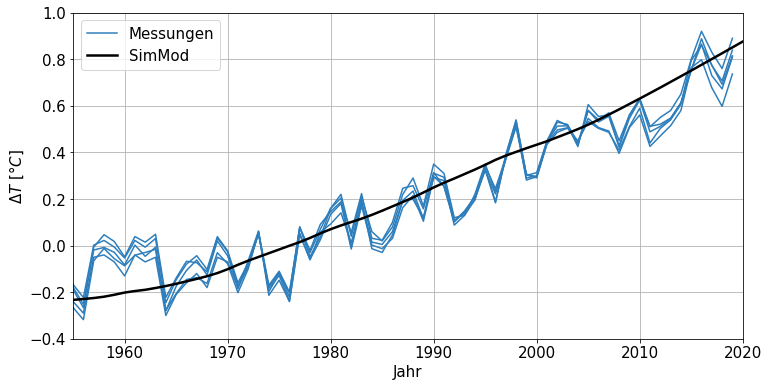

In [6]:
plt.subplots(figsize=(12,6))

plt.plot(obs_temp['year'], obs_temp['gistemp'], color=cmap(0.7), lw=1.5)
plt.plot(obs_temp['year'], obs_temp['hadcrut4'], color=cmap(0.7), lw=1.5)
plt.plot(obs_temp['year'], obs_temp['noaa'], color=cmap(0.7), lw=1.5)
plt.plot(obs_temp['year'], obs_temp['berkeley'], color=cmap(0.7), lw=1.5)
plt.plot(obs_temp['year'], obs_temp['cowtan_way'], color=cmap(0.7), lw=1.5, label='Messungen')

#plt.plot(simmod['year'], simmod['SimMod2.6_t'], color='k', lw=2.5, label="SimMod")
plt.plot(simmod['year'], simmod['SimMod4.5_t'], color='k', lw=2.5, label="SimMod")
#plt.plot(simmod['year'], simmod['SimMod6.0_t'], color='k', lw=2.5)
#plt.plot(simmod['year'], simmod['SimMod8.5_t'], color='k', lw=2.5)

#plt.xlim([1970,2018])
#plt.ylim([-0.3,1.35])
plt.xlim(1955, 2020)
plt.ylim(-0.4,1.)
plt.grid()
plt.xlabel(r"Jahr")
plt.ylabel(r"$\Delta T$ $[\degree C]$")
plt.legend()

#plt.savefig("figures/temp_time_SimMod_obs.pdf", bbox_inches="tight")
plt.show()